# Get all Internet users for each country and language spokent from 1990 onwards

Input
- language codes: https://www.ethnologue.com/sites/default/files/LanguageCodes.tab
- number-of-internet-users-by-country:

Output
- LangID: ISO 639-3 standard for language identifiers
- CountryID:
- Language: Language spoken
- Year: Year data was gathered
- Internet_users: number of active internet users
- Name_country: Name of the main country where used.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow import keras
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from os import listdir
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from os.path import isfile, join

In [4]:
users_country = pd.read_csv("../../data/number-of-internet-users-by-country.csv")
#users_country = users_country.drop(users_country.columns[1], axis=1)
users_country.columns = ["Country",'CountryID', "Year", "Internet_users"]

In [5]:
users_country.head(10)

,Country,CountryID,Year,Internet_users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,2001,990
2,Afghanistan,AFG,2002,1003
3,Afghanistan,AFG,2003,20272
4,Afghanistan,AFG,2004,25520
5,Afghanistan,AFG,2005,306904
6,Afghanistan,AFG,2006,545607
7,Afghanistan,AFG,2007,505719
8,Afghanistan,AFG,2008,502210
9,Afghanistan,AFG,2009,994154


In [6]:
number_countries = len(users_country['Country'].unique())
number_countries

193

In [7]:
languages_country = pd.read_csv('../../data/languages_country.csv', sep=';')

In [8]:
languages_country = languages_country.drop(languages_country.columns[2:4], axis=1)
languages_country.columns = ['Country', 'Language', 'LangID']

In [9]:
languages_country.head()

,Country,Language,LangID
0,Afghanistan,Persian,4096
1,Afghanistan,Uzbek,4096
2,Ã…land Islands,Swedish,4096
3,Albania,Albanian,1052
4,Albania,English,4096


In [10]:
merged = users_country.merge(languages_country, how='left', on='Country')

In [11]:
merged.head()

,Country,CountryID,Year,Internet_users,Language,LangID
0,Afghanistan,AFG,1990,0,Persian,4096.0
1,Afghanistan,AFG,1990,0,Uzbek,4096.0
2,Afghanistan,AFG,2001,990,Persian,4096.0
3,Afghanistan,AFG,2001,990,Uzbek,4096.0
4,Afghanistan,AFG,2002,1003,Persian,4096.0


In [12]:
language_internet_users = merged[['LangID','Language', 'Year', 'Internet_users', 'Country', 'CountryID']].sort_values(by=['Language','Year']).reset_index(drop = True)

In [13]:
language_internet_users.head()

,LangID,Language,Year,Internet_users,Country,CountryID
0,4096.0,Afrikaans,1990,0,Namibia,NAM
1,1078.0,Afrikaans,1990,0,South Africa,ZAF
2,1078.0,Afrikaans,1991,5106,South Africa,ZAF
3,1078.0,Afrikaans,1992,15299,South Africa,ZAF
4,1078.0,Afrikaans,1993,45840,South Africa,ZAF


In [14]:
language_internet_users.to_csv('../../data/internet_users_per_language_1990_2017.csv') 

In [15]:
# output: index: lang code & year, cols=[number of internet users, country(?)]

### Filter European Countries:

In [16]:
european_countries = {'Aland Islands',
 'Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Czechia',
 'Denmark',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'Germany',
 'Gibraltar',
 'Greece',
 'Guernsey',
 'Hungary',
 'Iceland',
 'Ireland',
 'Isle of Man',
 'Italy',
 'Jersey',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'Vatican State'}

In [17]:
data_europe = language_internet_users[language_internet_users['Country'].isin(european_countries)]

In [18]:
df = pd.read_csv("../../data/endangerment/extinct_languages.csv")
print(df.shape)
print(df.dtypes)
df[["ID", "Degree of endangerment"]]

(2722, 15)
ID                               int64
Name in English                 object
Name in French                  object
Name in Spanish                 object
Countries                       object
Country codes alpha 3           object
ISO639-3 codes                  object
Degree of endangerment          object
Alternate names                 object
Name in the language            object
Number of speakers             float64
Sources                         object
Latitude                       float64
Longitude                      float64
Description of the location     object
dtype: object


,ID,Degree of endangerment
0,1022,Vulnerable
1,1023,Vulnerable
2,383,Vulnerable
3,335,Vulnerable
4,382,Definitely endangered
...,...,...
2717,1972,Severely endangered
2718,2018,Definitely endangered
2719,2015,Definitely endangered
2720,2716,Definitely endangered


In [19]:
d = pd.Series(df["Degree of endangerment"].values,index=df.ID).to_dict()

In [20]:
data_europe['Endangerment Degree'] = data_europe['LangID'].map(d)

<ipython-input-20-756d55f45d2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_europe['Endangerment Degree'] = data_europe['LangID'].map(d)


In [21]:
data_europe

,LangID,Language,Year,Internet_users,Country,CountryID,Endangerment Degree
95,1052.0,Albanian,1990,0,Albania,ALB,Definitely endangered
96,4096.0,Albanian,1990,0,North Macedonia,MKD,NaN
97,1052.0,Albanian,1995,347,Albania,ALB,Definitely endangered
98,4096.0,Albanian,1995,808,North Macedonia,MKD,NaN
99,1052.0,Albanian,1996,996,Albania,ALB,Definitely endangered
...,...,...,...,...,...,...,...
13027,NaN,NaN,2013,1749193,Bosnia and Herzegovina,BIH,NaN
13043,NaN,NaN,2014,1780067,Bosnia and Herzegovina,BIH,NaN
13059,NaN,NaN,2015,1859915,Bosnia and Herzegovina,BIH,NaN
13075,NaN,NaN,2016,2119233,Bosnia and Herzegovina,BIH,NaN


In [22]:
data_europe_nona = data_europe.dropna()

In [23]:
ENDANGERMENT_MAP = {
    "Vulnerable": 1,
    "Definitely endangered": 2,
    "Severely endangered": 3,
    "Critically endangered": 4,
    "Extinct": 5,
}
data_europe_nona["Endangerment Code"] = data_europe_nona["Endangerment Degree"].apply(lambda x: ENDANGERMENT_MAP[x])

<ipython-input-23-b3c0af14e60b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_europe_nona["Endangerment Code"] = data_europe_nona["Endangerment Degree"].apply(lambda x: ENDANGERMENT_MAP[x])


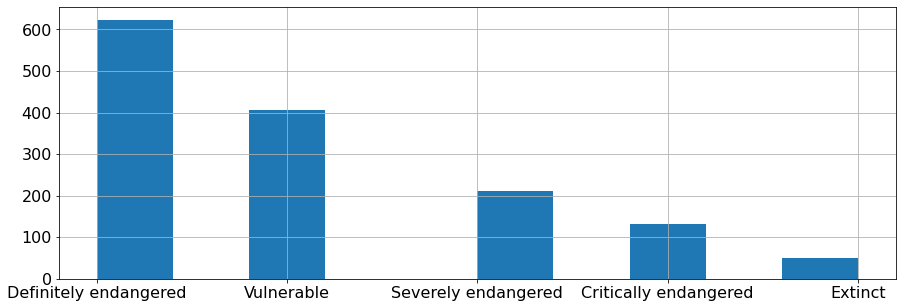

In [24]:
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
data_europe_nona["Endangerment Degree"].hist(figsize=(15,5)).get_figure().savefig('endangered_hist.png', format="png")

## Deep Neural Network for Time Series Classification

Building a deep neural network in order to classify the endangerment status of an language based on their past internet usage

In [25]:
data_europe_nona[["Year", "Internet_users","Language", "Country", "Endangerment Code"]]

,Year,Internet_users,Language,Country,Endangerment Code
95,1990,0,Albanian,Albania,2
97,1995,347,Albanian,Albania,2
99,1996,996,Albanian,Albania,2
101,1997,1503,Albanian,Albania,2
103,1998,2018,Albanian,Albania,2
...,...,...,...,...,...
12527,2013,15821975,Western Frisian,Netherlands,2
12528,2014,15481910,Western Frisian,Netherlands,2
12529,2015,15536692,Western Frisian,Netherlands,2
12530,2016,15358408,Western Frisian,Netherlands,2


## Data Pre-Processing

### Map Country-Language

In [26]:
def map_country_language(row):
    return row["Country"]+"-"+row["Language"]
data_europe_nona["Country-Language"]=data_europe_nona.apply(lambda row: map_country_language(row), axis=1)
data_europe_nona

<ipython-input-26-32dbf1e42569>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_europe_nona["Country-Language"]=data_europe_nona.apply(lambda row: map_country_language(row), axis=1)


,LangID,Language,Year,Internet_users,Country,CountryID,Endangerment Degree,Endangerment Code,Country-Language
95,1052.0,Albanian,1990,0,Albania,ALB,Definitely endangered,2,Albania-Albanian
97,1052.0,Albanian,1995,347,Albania,ALB,Definitely endangered,2,Albania-Albanian
99,1052.0,Albanian,1996,996,Albania,ALB,Definitely endangered,2,Albania-Albanian
101,1052.0,Albanian,1997,1503,Albania,ALB,Definitely endangered,2,Albania-Albanian
103,1052.0,Albanian,1998,2018,Albania,ALB,Definitely endangered,2,Albania-Albanian
...,...,...,...,...,...,...,...,...,...
12527,1122.0,Western Frisian,2013,15821975,Netherlands,NLD,Definitely endangered,2,Netherlands-Western Frisian
12528,1122.0,Western Frisian,2014,15481910,Netherlands,NLD,Definitely endangered,2,Netherlands-Western Frisian
12529,1122.0,Western Frisian,2015,15536692,Netherlands,NLD,Definitely endangered,2,Netherlands-Western Frisian
12530,1122.0,Western Frisian,2016,15358408,Netherlands,NLD,Definitely endangered,2,Netherlands-Western Frisian


### Number of Entities per Country-Language before standartization

Text(0.5, 0, 'Number of entries')

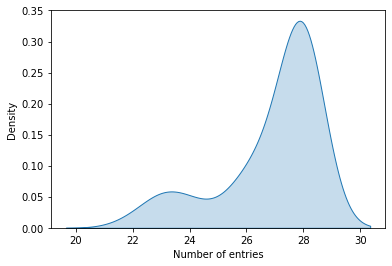

In [30]:
import seaborn as sns
import numpy as np
number_of_entries = []
country_langs= data_europe_nona["Country-Language"].drop_duplicates().to_list()
for c in country_langs:
    number_of_entries.append(len(data_europe_nona[data_europe_nona["Country-Language"]==c]))
sns.kdeplot(number_of_entries,fill=True)
plt.xlabel('Number of entries')

In [31]:
number_of_entries = np.array(number_of_entries)
min_number = number_of_entries.min()
red_data = data_europe_nona[data_europe_nona['Country-Language']==country_langs[0]]
red_data = red_data[len(red_data)-min_number::]
for i in range(1,len(country_langs)):
    data_i = data_europe_nona[data_europe_nona['Country-Language']==country_langs[i]]
    data_i = data_i[len(data_i)-min_number::]
    red_data = red_data.append(data_i)
red_data = red_data[["Year","Internet_users","Country-Language","Endangerment Degree"]]
red_data.head()

,Year,Internet_users,Country-Language,Endangerment Degree
97,1995,347,Albania-Albanian,Definitely endangered
99,1996,996,Albania-Albanian,Definitely endangered
101,1997,1503,Albania-Albanian,Definitely endangered
103,1998,2018,Albania-Albanian,Definitely endangered
105,1999,2537,Albania-Albanian,Definitely endangered


### Histogram of the number of entries after the standardization:

Text(0.5, 0, 'Number of entries')

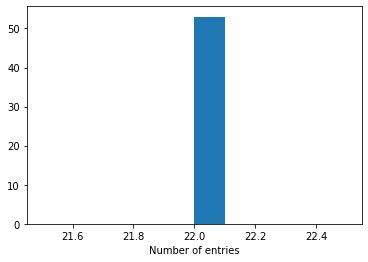

In [33]:
number_of_entries = []
for c in country_langs:
    number_of_entries.append(len(red_data[red_data['Country-Language']==c]))
plt.hist(number_of_entries)
plt.xlabel('Number of entries')

/Users/anton/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Endangerment Degree', ylabel='count'>

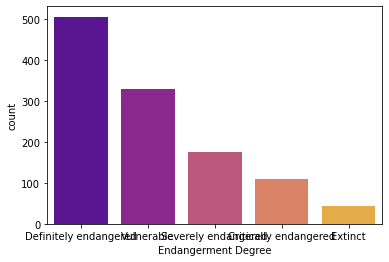

In [34]:
sns.countplot(red_data["Endangerment Degree"],palette='plasma')

### Taking a look at internet-usage progression combined with the endangerment status

In [35]:
red_data_label = red_data.reset_index().drop('index',axis=1)
tot = int(len(red_data_label)/min_number)
labels=[]
for i in range(0,tot):
    labels.append(red_data_label.loc[i*min_number:(i+1)*min_number]["Endangerment Degree"].to_list()[0])

In [36]:
def pick_country_language(data):
    country_langs = data["Country-Language"].drop_duplicates().to_list()
    country_lang = np.random.choice(country_langs)
    return data[data['Country-Language']==country_lang]

def plot_data(data,color='navy'):
    data = data.reset_index().drop(columns='index')
    country_lang = data_i[0:1]["Country-Language"].to_list()[0]
    index_to_plot = np.linspace(0,len(data)-1,5).astype(int)
    indexes = data.index.to_list()
    y = data["Internet_users"]
    x = data["Year"]
    sns.lineplot(x=indexes,y=y,label=country_lang,color=color)
    plt.xticks(index_to_plot,data["Year"].loc[index_to_plot])
    plt.legend(fontsize=20)
    plt.xlabel('Year',fontsize=30)
    plt.ylabel('Country Languages',fontsize=30)

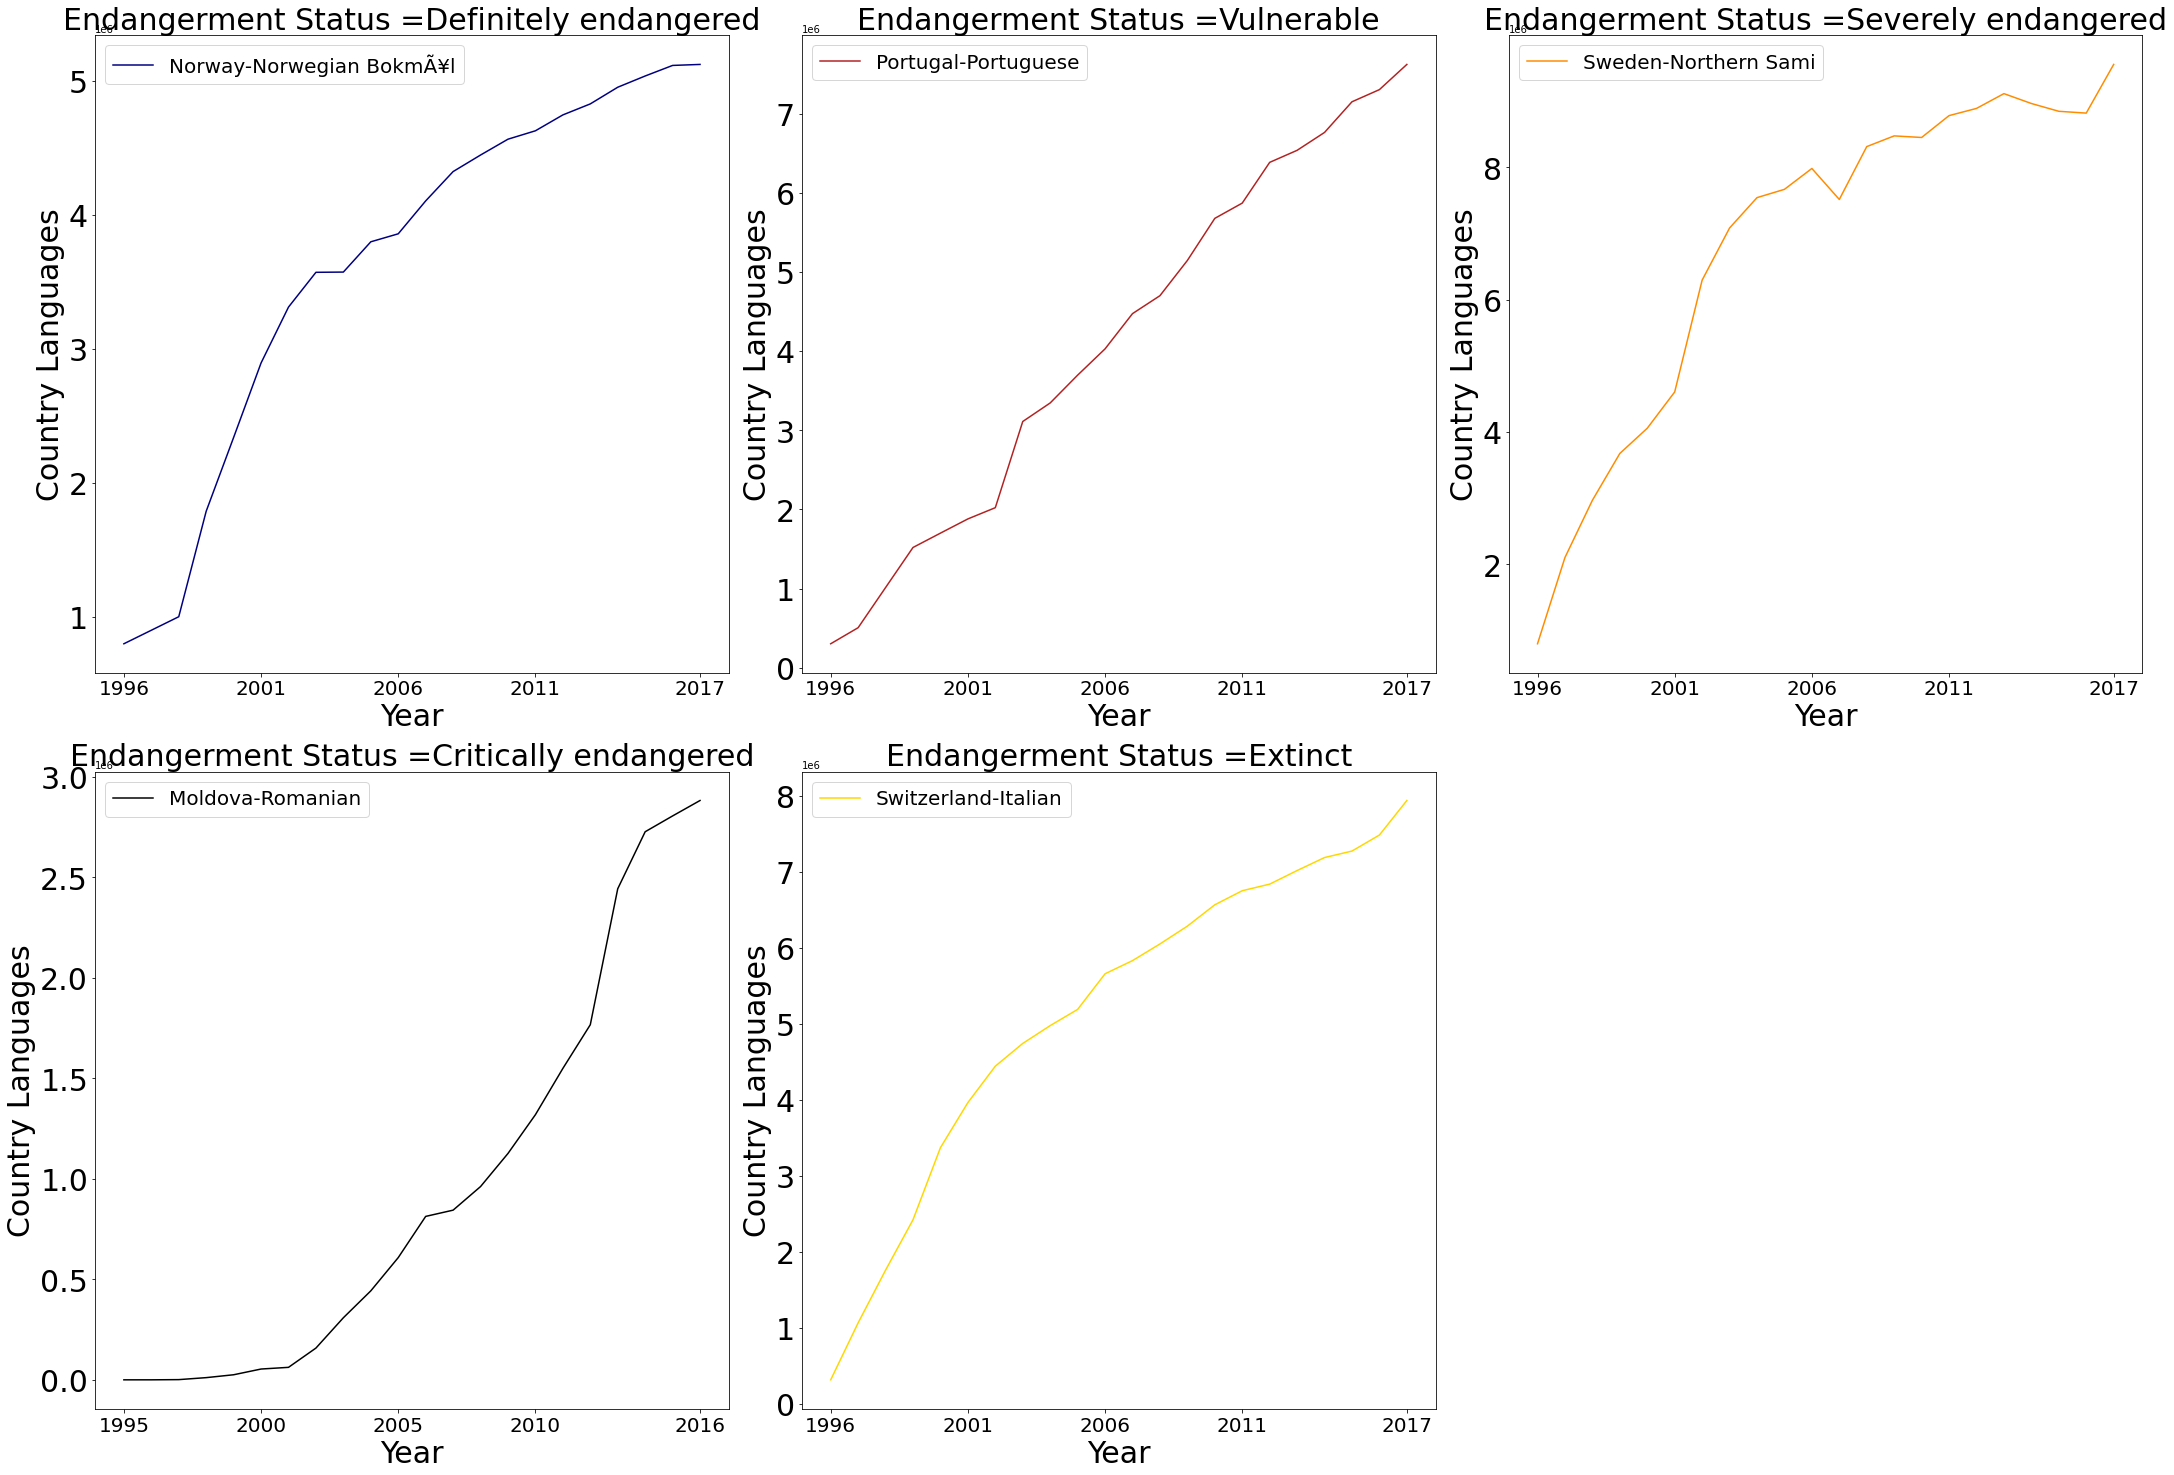

In [37]:
endangerment_codes = red_data["Endangerment Degree"].drop_duplicates().to_list()
data_list = []
for e_degree in endangerment_codes:
    data_list.append(red_data[red_data["Endangerment Degree"]==e_degree])
i=1
colors = ['navy','firebrick','darkorange','k','gold','darkgrey','purple']
plt.figure(figsize=(30,30))

for e_degree_data in data_list:
    plt.subplot(3,3,i)
    data_i = pick_country_language(e_degree_data)
    e_degree = data_i["Endangerment Degree"].to_list()[0]
    plt.title('Endangerment Status =%s'%(e_degree),fontsize=30)
    plot_data(data_i,color=colors[i-1])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=30)
    i=i+1
plt.tight_layout()

### Prepare data to use on DL model

In [43]:
from sklearn.preprocessing import LabelEncoder
labels = np.array(labels)
le = LabelEncoder()
le = le.fit(labels)
labels = np.array(le.transform(labels))
red_data = red_data.reset_index().drop(columns='index')
len_data = len(red_data)
len_train_country = int((len_data/min_number)*0.8)
len_train = int(len_train_country*min_number)
red_train_data = red_data[0:len_train]
red_test_data = red_data[len_train:len_data]
len_test_country = int((len(red_test_data)/min_number))

x = np.array(red_data["Internet_users"])
y = labels
x = x.reshape(min_number,int(len(x)/min_number))
idx = np.arange(0,22,1)
idx_random = np.random.choice(idx,len(y))
x_train,y_train = x[idx_random][0:len_train_country],y[idx_random][0:len_train_country]
x_test,y_test = x[idx_random][len_train_country:len(y)],y[idx_random][len_train_country:len(y)]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
num_classes = 5

In [39]:
len(x)

22

### Model

In [44]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])


### Summary

In [45]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 53, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 53, 64)            256       
_________________________________________________________________
batch_normalization (BatchNo (None, 53, 64)            256       
_________________________________________________________________
re_lu (ReLU)                 (None, 53, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 53, 64)            12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 64)            256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 53, 64)            0     

### Train the model

In [46]:
epochs = 500
batch_size = 5

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/500
42/42 [==============================] - 1s 17ms/sample - loss: 1.5693 - sparse_categorical_accuracy: 0.3333
Epoch 2/500
42/42 [==============================] - 0s 2ms/sample - loss: 1.2653 - sparse_categorical_accuracy: 0.5714
Epoch 3/500
42/42 [==============================] - 0s 2ms/sample - loss: 1.1183 - sparse_categorical_accuracy: 0.6190
Epoch 4/500
42/42 [==============================] - 0s 2ms/sample - loss: 1.0045 - sparse_categorical_accuracy: 0.6429
Epoch 5/500
42/42 [==============================] - 0s 2ms/sample - loss: 0.9181 - sparse_categorical_accuracy: 0.6667
Epoch 6/500
42/42 [==============================] - 0s 2ms/sample - loss: 0.8935 - sparse_categorical_accuracy: 0.6905
Epoch 7/500
42/42 [==============================] - 0s 795us/sample - loss: 0.9483 - sparse_categorical_accuracy: 0.6667
Epoch 8/500
42/42 [==============================] - 0s 2ms/sample - loss: 0.8512 - sparse_categorical_accuracy: 0.7143
Epoch 9/500
42/42 [==================

Epoch 68/500
42/42 [==============================] - 0s 673us/sample - loss: 0.6419 - sparse_categorical_accuracy: 0.7857
Epoch 69/500
42/42 [==============================] - 0s 655us/sample - loss: 0.6486 - sparse_categorical_accuracy: 0.7619
Epoch 70/500
42/42 [==============================] - 0s 612us/sample - loss: 0.6248 - sparse_categorical_accuracy: 0.7857
Epoch 71/500
42/42 [==============================] - 0s 568us/sample - loss: 0.6502 - sparse_categorical_accuracy: 0.7619
Epoch 72/500
42/42 [==============================] - 0s 606us/sample - loss: 0.6355 - sparse_categorical_accuracy: 0.7619
Epoch 73/500
42/42 [==============================] - 0s 591us/sample - loss: 0.5781 - sparse_categorical_accuracy: 0.7857
Epoch 74/500
42/42 [==============================] - 0s 1ms/sample - loss: 0.6356 - sparse_categorical_accuracy: 0.7381
Epoch 75/500
42/42 [==============================] - 0s 632us/sample - loss: 0.6143 - sparse_categorical_accuracy: 0.8095
Epoch 76/500
42/42

42/42 [==============================] - 0s 587us/sample - loss: 0.5928 - sparse_categorical_accuracy: 0.7857
Epoch 135/500
42/42 [==============================] - 0s 751us/sample - loss: 0.6113 - sparse_categorical_accuracy: 0.8095
Epoch 136/500
42/42 [==============================] - 0s 611us/sample - loss: 0.6314 - sparse_categorical_accuracy: 0.7143
Epoch 137/500
42/42 [==============================] - 0s 2ms/sample - loss: 0.4296 - sparse_categorical_accuracy: 0.9524
Epoch 138/500
42/42 [==============================] - 0s 658us/sample - loss: 0.5701 - sparse_categorical_accuracy: 0.7143
Epoch 139/500
42/42 [==============================] - 0s 622us/sample - loss: 0.4888 - sparse_categorical_accuracy: 0.8571
Epoch 140/500
42/42 [==============================] - 0s 600us/sample - loss: 0.5261 - sparse_categorical_accuracy: 0.8571
Epoch 141/500
42/42 [==============================] - 0s 652us/sample - loss: 0.6271 - sparse_categorical_accuracy: 0.8095
Epoch 142/500
42/42 [===

42/42 [==============================] - 0s 609us/sample - loss: 0.4384 - sparse_categorical_accuracy: 0.8571
Epoch 201/500
42/42 [==============================] - 0s 627us/sample - loss: 0.5075 - sparse_categorical_accuracy: 0.8095
Epoch 202/500
42/42 [==============================] - 0s 564us/sample - loss: 0.4599 - sparse_categorical_accuracy: 0.8571
Epoch 203/500
42/42 [==============================] - 0s 582us/sample - loss: 0.4450 - sparse_categorical_accuracy: 0.8333
Epoch 204/500
42/42 [==============================] - 0s 572us/sample - loss: 0.5046 - sparse_categorical_accuracy: 0.8571
Epoch 205/500
42/42 [==============================] - 0s 638us/sample - loss: 0.4728 - sparse_categorical_accuracy: 0.8333
Epoch 206/500
42/42 [==============================] - 0s 571us/sample - loss: 0.6051 - sparse_categorical_accuracy: 0.7381
Epoch 207/500
42/42 [==============================] - 0s 560us/sample - loss: 0.4480 - sparse_categorical_accuracy: 0.9048
Epoch 208/500
42/42 [=

In [47]:
### Results:

In [48]:
pred = model.predict(x_test)
res = []
for p in pred:
    res.append(p.argmax())
print('The accuracy score on the test set is %.2f'%accuracy_score(res,y_test))

The accuracy score on the test set is 0.82


In [49]:
print(classification_report(res,y_test))

              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           3       1.00      1.00      1.00         1
           4       0.60      1.00      0.75         3

    accuracy                           0.82        11
   macro avg       0.87      0.90      0.86        11
weighted avg       0.89      0.82      0.83        11



### Confusion Matrix

In [51]:
res = le.inverse_transform(res)
y_test = le.inverse_transform(y_test)
results = pd.DataFrame({'Predict':res,'Target':y_test})
results.head()

,Predict,Target
0,1,4
1,4,4
2,1,1
3,3,3
4,1,1
